In [1]:
#conda install lightgbm

In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns
import lightgbm as lgb
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn_pandas import DataFrameMapper
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
#from xgboost import XGBRegressor
from pandas.tseries.offsets import DateOffset
import warnings
warnings.filterwarnings('ignore')

In [3]:
df5=pd.read_csv('main_clean')

In [4]:
df_f=pd.read_csv('footfall_clean')

In [5]:
df=pd.merge(df5,df_f,how='left')
df.head()

,Date,year,month,day,city,medicine,sales,dayofweek,quarter,footfall
0,2015-06-01,2015,6,1,1,1292,56.0,0,2,14356.0
1,2015-06-01,2015,6,1,1,1,4.0,0,2,14356.0
2,2015-06-01,2015,6,1,1,2,148.0,0,2,14356.0
3,2015-06-01,2015,6,1,1,3,100.0,0,2,14356.0
4,2015-06-01,2015,6,1,1,4,20.0,0,2,14356.0


In [6]:
df_t=pd.read_csv('/Users/boltwrath/Desktop/class/projestd/Final/Data/test_data.csv')
df_t.describe()

,id,year,month,day,city,medicine
count,773535.000000,773535.0,773535.0,773535.000000,773535.000000,773535.000000
mean,386768.000000,2018.0,7.0,15.971202,5.498414,1589.581626
std,223300.464575,0.0,0.0,9.002002,2.845757,978.991995
min,1.000000,2018.0,7.0,1.000000,1.000000,1.000000
25%,193384.500000,2018.0,7.0,8.000000,3.000000,728.000000
50%,386768.000000,2018.0,7.0,16.000000,5.000000,1571.000000
75%,580151.500000,2018.0,7.0,24.000000,8.000000,2419.000000
max,773535.000000,2018.0,7.0,31.000000,10.000000,3423.000000


In [7]:
df_test=df_t.drop('id',axis=1)

In [8]:
df_test['Date']=pd.to_datetime(df_test[["year","month","day"]])
df_test['dayofweek'] = df_test['Date'].dt.dayofweek
df_test['quarter'] = df_test['Date'].dt.quarter

In [9]:
df.head()

,Date,year,month,day,city,medicine,sales,dayofweek,quarter,footfall
0,2015-06-01,2015,6,1,1,1292,56.0,0,2,14356.0
1,2015-06-01,2015,6,1,1,1,4.0,0,2,14356.0
2,2015-06-01,2015,6,1,1,2,148.0,0,2,14356.0
3,2015-06-01,2015,6,1,1,3,100.0,0,2,14356.0
4,2015-06-01,2015,6,1,1,4,20.0,0,2,14356.0


In [10]:
df_test.head()

,year,month,day,city,medicine,Date,dayofweek,quarter
0,2018,7,1,1,1292,2018-07-01,6,3
1,2018,7,1,1,1,2018-07-01,6,3
2,2018,7,1,1,2,2018-07-01,6,3
3,2018,7,1,1,3,2018-07-01,6,3
4,2018,7,1,1,4,2018-07-01,6,3


In [11]:
month_grp= df.groupby(['month'])
day_grp= df.groupby(['day'])
city_grp= df.groupby(['city'])
medicine_grp= df.groupby(['medicine'])
dayofweek_grp= df.groupby(['dayofweek'])

In [12]:
month_agg=month_grp['sales'].agg(['mean'])
month_agg_f=month_grp['footfall'].agg(['mean'])

<AxesSubplot:xlabel='month'>

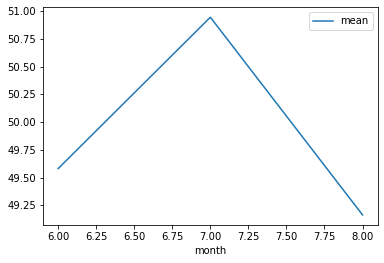

In [13]:
sns.lineplot(data=month_agg)

In [14]:
day_agg=day_grp['sales'].agg(['mean'])
day_agg_f=day_grp['footfall'].agg(['mean'])

<AxesSubplot:xlabel='day'>

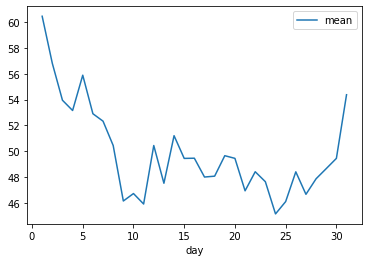

In [15]:
sns.lineplot(data=day_agg)

In [16]:
dayofweek_agg=dayofweek_grp['sales'].agg(['mean'])
dayofweek_agg_f=dayofweek_grp['footfall'].agg(['mean'])

<AxesSubplot:xlabel='dayofweek'>

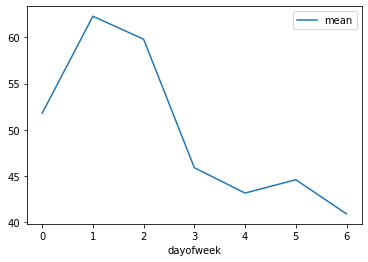

In [17]:
sns.lineplot(data=dayofweek_agg)

In [18]:
medicine_agg=medicine_grp['sales'].agg(['mean'])
medicine_agg_f=medicine_grp['footfall'].agg(['mean'])

<AxesSubplot:xlabel='medicine', ylabel='mean'>

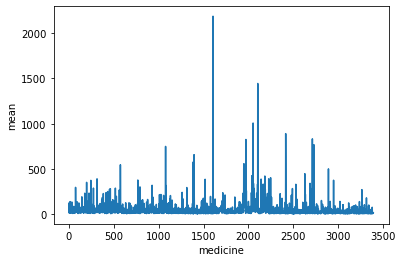

In [19]:
sns.lineplot(data=medicine_agg["mean"])

In [20]:
city_agg=city_grp['sales'].agg(['mean'])
city_agg_f=city_grp['footfall'].agg(['mean'])

<AxesSubplot:xlabel='city', ylabel='mean'>

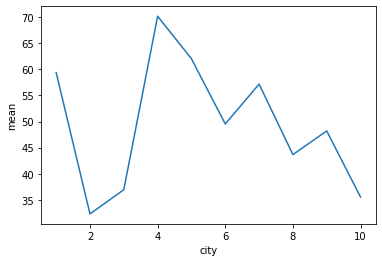

In [21]:
sns.lineplot(data=city_agg["mean"])

In [22]:
df11= df.merge(df.merge(day_agg,on='day',sort=False))
df11.rename(columns = {'mean': 'day_mean'}, inplace = True)
df1= df11.merge(df11.merge(day_agg_f,on='day',sort=False))
df1.rename(columns = {'mean': 'day_mean_f'}, inplace = True)
df1.head()

,Date,year,month,day,city,medicine,sales,dayofweek,quarter,footfall,day_mean,day_mean_f
0,2015-06-01,2015,6,1,1,1292,56.0,0,2,14356.0,60.471096,13630.56735
1,2015-06-01,2015,6,1,1,1,4.0,0,2,14356.0,60.471096,13630.56735
2,2015-06-01,2015,6,1,1,2,148.0,0,2,14356.0,60.471096,13630.56735
3,2015-06-01,2015,6,1,1,3,100.0,0,2,14356.0,60.471096,13630.56735
4,2015-06-01,2015,6,1,1,4,20.0,0,2,14356.0,60.471096,13630.56735


In [23]:
df_test11= df_test.merge(df_test.merge(day_agg,on='day',sort=False))
df_test11.rename(columns = {'mean': 'day_mean'}, inplace = True)
df_test1= df_test11.merge(df_test11.merge(day_agg_f,on='day',sort=False))
df_test1.rename(columns = {'mean': 'day_mean_f'}, inplace = True)
df_test1.head()

,year,month,day,city,medicine,Date,dayofweek,quarter,day_mean,day_mean_f
0,2018,7,1,1,1292,2018-07-01,6,3,60.471096,13630.56735
1,2018,7,1,1,1,2018-07-01,6,3,60.471096,13630.56735
2,2018,7,1,1,2,2018-07-01,6,3,60.471096,13630.56735
3,2018,7,1,1,3,2018-07-01,6,3,60.471096,13630.56735
4,2018,7,1,1,4,2018-07-01,6,3,60.471096,13630.56735


In [24]:
df2= df1.merge(df1.merge(medicine_agg,on='medicine',sort=False))
df2.rename(columns = {'mean': 'medicine_mean'}, inplace = True)
df21= df1.merge(df2.merge(medicine_agg_f,on='medicine',sort=False))
df21.rename(columns = {'mean': 'medicine_mean_f'}, inplace = True)


In [25]:
df_test2= df_test1.merge(df_test1.merge(medicine_agg,on='medicine',how= 'outer',sort=False))
df_test2.rename(columns = {'mean': 'medicine_mean'}, inplace = True)
df_test21= df_test1.merge(df_test2.merge(medicine_agg_f,on='medicine',how= 'outer',sort=False))
df_test21.rename(columns = {'mean': 'medicine_mean_f'}, inplace = True)


In [26]:
df3= df21.merge(df21.merge(city_agg,on='city',sort=False))
df3.rename(columns = {'mean': 'city_mean'}, inplace = True)
df31= df3.merge(df3.merge(city_agg_f,on='city',sort=False))
df31.rename(columns = {'mean': 'city_mean_f'}, inplace = True)


In [27]:
df_test3= df_test21.merge(df_test21.merge(city_agg,on='city',sort=False))
df_test3.rename(columns = {'mean': 'city_mean'}, inplace = True)
df_test31= df_test3.merge(df_test3.merge(city_agg_f,on='city',sort=False))
df_test31.rename(columns = {'mean': 'city_mean_f'}, inplace = True)


In [28]:
df4= df31.merge(df31.merge(month_agg,on='month',sort=False))
df4.rename(columns = {'mean': 'month_mean'}, inplace = True)
df41= df4.merge(df31.merge(month_agg_f,on='month',sort=False))
df41.rename(columns = {'mean': 'month_mean_f'}, inplace = True)


In [29]:
df_test4= df_test31.merge(df_test31.merge(month_agg,on='month',sort=False))
df_test4.rename(columns = {'mean': 'month_mean'}, inplace = True)
df_test41= df_test4.merge(df_test4.merge(month_agg_f,on='month',sort=False))
df_test41.rename(columns = {'mean': 'month_mean_f'}, inplace = True)


In [30]:
df5= df41.merge(df41.merge(dayofweek_agg,on='dayofweek',sort=False))
df5.rename(columns = {'mean': 'dayofweek_mean'}, inplace = True)
df_main= df5.merge(df5.merge(dayofweek_agg_f,on='dayofweek',sort=False))
df_main.rename(columns = {'mean': 'dayofweek_mean_f'}, inplace = True)



In [31]:
df_test5= df_test41.merge(df_test41.merge(dayofweek_agg,on='dayofweek',sort=False))
df_test5.rename(columns = {'mean': 'dayofweek_mean'}, inplace = True)
df_main_t= df_test5.merge(df_test5.merge(dayofweek_agg_f,on='dayofweek',sort=False))
df_main_t.rename(columns = {'mean': 'dayofweek_mean_f'}, inplace = True)

In [32]:
df_main.head()

,Date,year,month,day,city,medicine,sales,dayofweek,quarter,footfall,day_mean,day_mean_f,medicine_mean,medicine_mean_f,city_mean,city_mean_f,month_mean,month_mean_f,dayofweek_mean,dayofweek_mean_f
0,2015-06-01,2015,6,1,1,1292,56.0,0,2,14356.0,60.471096,13630.56735,23.960425,12429.260535,59.353949,12579.50207,49.581573,12376.80048,51.787851,13286.423505
1,2015-06-01,2015,6,1,1,1,4.0,0,2,14356.0,60.471096,13630.56735,23.596844,12467.489240,59.353949,12579.50207,49.581573,12376.80048,51.787851,13286.423505
2,2015-06-01,2015,6,1,1,2,148.0,0,2,14356.0,60.471096,13630.56735,69.643944,12334.403706,59.353949,12579.50207,49.581573,12376.80048,51.787851,13286.423505
3,2015-06-01,2015,6,1,1,3,100.0,0,2,14356.0,60.471096,13630.56735,123.892388,12309.486877,59.353949,12579.50207,49.581573,12376.80048,51.787851,13286.423505
4,2015-06-01,2015,6,1,1,4,20.0,0,2,14356.0,60.471096,13630.56735,22.927114,12477.046647,59.353949,12579.50207,49.581573,12376.80048,51.787851,13286.423505


In [33]:
df_main_t.head()

,year,month,day,city,medicine,Date,dayofweek,quarter,day_mean,day_mean_f,medicine_mean,medicine_mean_f,city_mean,city_mean_f,month_mean,month_mean_f,dayofweek_mean,dayofweek_mean_f
0,2018,7,1,1,1292,2018-07-01,6,3,60.471096,13630.56735,23.960425,12429.260535,59.353949,12579.50207,50.944719,12322.888339,40.892422,11404.847924
1,2018,7,1,1,1,2018-07-01,6,3,60.471096,13630.56735,23.596844,12467.489240,59.353949,12579.50207,50.944719,12322.888339,40.892422,11404.847924
2,2018,7,1,1,2,2018-07-01,6,3,60.471096,13630.56735,69.643944,12334.403706,59.353949,12579.50207,50.944719,12322.888339,40.892422,11404.847924
3,2018,7,1,1,3,2018-07-01,6,3,60.471096,13630.56735,123.892388,12309.486877,59.353949,12579.50207,50.944719,12322.888339,40.892422,11404.847924
4,2018,7,1,1,4,2018-07-01,6,3,60.471096,13630.56735,22.927114,12477.046647,59.353949,12579.50207,50.944719,12322.888339,40.892422,11404.847924


In [34]:
df_main.corr()

,year,month,day,city,medicine,sales,dayofweek,quarter,footfall,day_mean,day_mean_f,medicine_mean,medicine_mean_f,city_mean,city_mean_f,month_mean,month_mean_f,dayofweek_mean,dayofweek_mean_f
year,1.000000,-0.269536,-0.008995,0.002995,0.357374,0.008981,0.014031,-0.307771,0.013499,-0.006762,-0.007508,0.023454,0.012328,0.000017,-0.000413,-0.109448,-0.117150,-0.010546,-0.013909
month,-0.269536,1.000000,0.024646,0.000531,-0.077576,-0.001034,-0.014322,0.883628,0.037398,0.018446,0.024837,-0.001317,0.029357,-0.000766,-0.000519,-0.140045,0.779868,0.023195,0.024665
day,-0.008995,0.024646,1.000000,-0.000538,0.002266,-0.021902,-0.012270,0.026731,-0.073758,-0.613660,-0.553891,0.002683,-0.005300,0.001077,0.000894,0.007024,0.012598,0.007127,0.006613
city,0.002995,0.000531,-0.000538,1.000000,0.006518,-0.022968,-0.001537,0.000683,0.002069,0.000768,0.000565,0.001320,0.007102,-0.190283,0.002574,0.000379,0.000127,0.002021,0.002025
medicine,0.357374,-0.077576,0.002266,0.006518,1.000000,0.019834,0.004921,-0.069054,0.009616,-0.003370,-0.002786,0.029365,0.137641,0.003414,0.006060,0.009796,-0.059824,-0.002660,-0.003399
sales,0.008981,-0.001034,-0.021902,-0.022968,0.019834,1.000000,-0.061171,0.002509,0.151420,0.035690,0.032461,0.675424,-0.161359,0.120703,0.106424,0.007382,-0.005382,0.079061,0.075619
dayofweek,0.014031,-0.014322,-0.012270,-0.001537,0.004921,-0.061171,1.000000,0.002601,-0.310311,-0.012587,-0.060142,0.009065,-0.016669,0.003213,0.002403,0.034270,-0.031566,-0.773712,-0.819282
quarter,-0.307771,0.883628,0.026731,0.000683,-0.069054,0.002509,0.002601,1.000000,0.018992,0.021004,0.029180,0.006246,0.031323,-0.000908,-0.000533,0.339829,0.396053,0.004944,0.007369
footfall,0.013499,0.037398,-0.073758,0.002069,0.009616,0.151420,-0.310311,0.018992,1.000000,0.121113,0.133163,-0.016690,0.069860,0.708611,0.803684,-0.034958,0.047954,0.362271,0.378760
day_mean,-0.006762,0.018446,-0.613660,0.000768,-0.003370,0.035690,-0.012587,0.021004,0.121113,1.000000,0.909507,-0.003633,0.008314,-0.001764,-0.001598,0.007366,0.008096,0.024501,0.015726


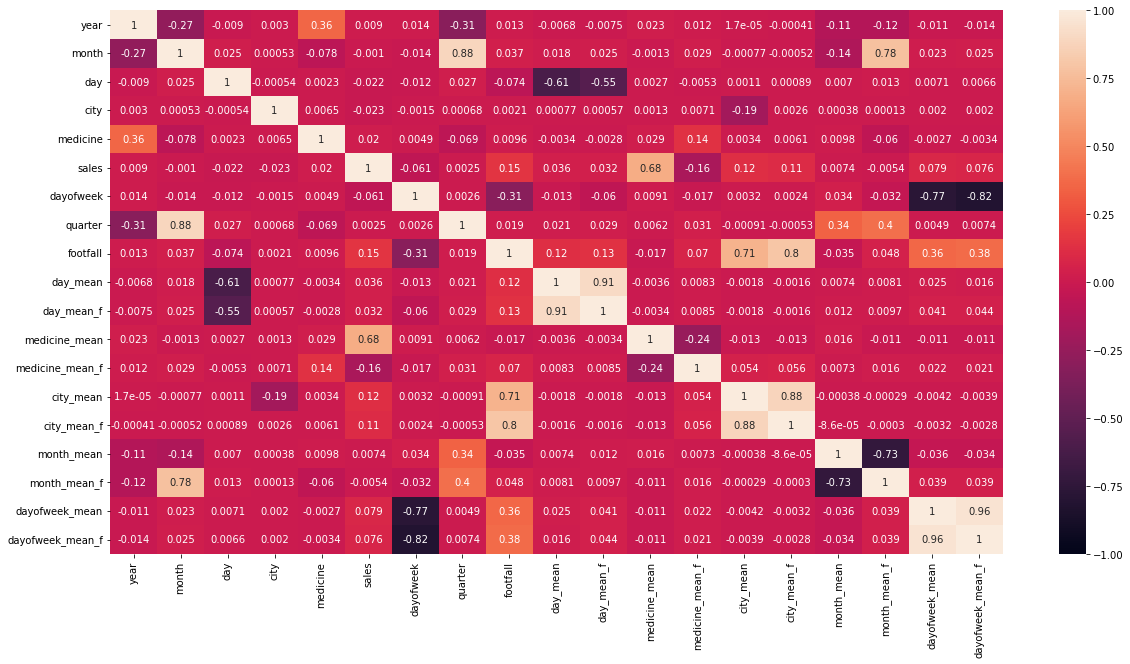

In [35]:
plt.figure(figsize = (20,10))
sns.heatmap(df_main.corr(),vmin=-1, vmax=1, annot=True)
plt.savefig('HeatPlot.png')

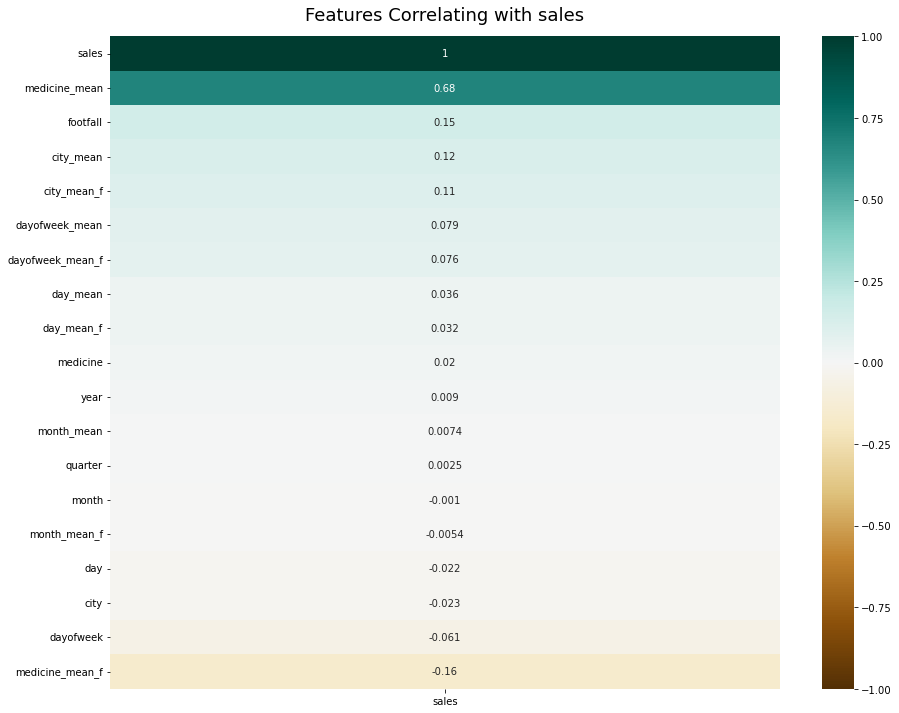

In [36]:
plt.figure(figsize=(15, 12))
heatmap = sns.heatmap(df_main.corr()[['sales']].sort_values(by='sales', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with sales', fontdict={'fontsize':18}, pad=16)
plt.savefig('HeatMap_Sales.png')

In [37]:
categorical_list=["dayofweek","day","city","month","medicine"]
numeric_list=["city_mean","dayofweek_mean","medicine_mean","day_mean","month_mean","medicine_mean_f","month_mean_f"]

In [38]:
df_main[categorical_list] = df_main[categorical_list].astype("category")    
df_main_t[categorical_list] = df_main_t[categorical_list].astype("category")  

In [39]:
drop=["Date","year","quarter","day_mean_f","city_mean_f","dayofweek_mean_f"]

In [40]:
df_main.drop("footfall", axis=1, inplace=True)

In [41]:
df_main.drop(drop, axis=1, inplace=True)
df_main_t.drop(drop, axis=1, inplace=True)

In [42]:
df_main_t.describe()

,day_mean,medicine_mean,medicine_mean_f,city_mean,month_mean,month_mean_f,dayofweek_mean
count,773535.000000,771141.000000,771141.000000,773535.000000,7.735350e+05,7.735350e+05,773535.000000
mean,49.941613,49.787020,12412.760822,49.957557,5.094472e+01,1.232289e+04,50.137449
std,3.558355,71.314311,307.684826,11.904144,2.553834e-10,7.996646e-08,7.960856
min,45.132007,4.000000,9253.000000,32.315138,5.094472e+01,1.232289e+04,40.892422
25%,47.511856,19.810909,12315.873892,36.950851,5.094472e+01,1.232289e+04,43.147966
50%,49.439215,31.942773,12385.707744,49.528334,5.094472e+01,1.232289e+04,45.894606
75%,52.328494,52.548341,12521.609065,59.353949,5.094472e+01,1.232289e+04,59.807113
max,60.471096,1444.430327,20948.000000,70.149446,5.094472e+01,1.232289e+04,62.293239


In [43]:
df_main_t.isna().sum()

month                 0
day                   0
city                  0
medicine              0
dayofweek             0
day_mean              0
medicine_mean      2394
medicine_mean_f    2394
city_mean             0
month_mean            0
month_mean_f          0
dayofweek_mean        0
dtype: int64

In [44]:

mean_value=df_main_t['medicine_mean'].median()
mean_value_f=df_main_t['medicine_mean_f'].median()


In [45]:
df_main_t['medicine_mean'].fillna(value=mean_value, inplace=True)
df_main_t['medicine_mean_f'].fillna(value=mean_value_f, inplace=True)



In [46]:
df_main_t.describe()

,day_mean,medicine_mean,medicine_mean_f,city_mean,month_mean,month_mean_f,dayofweek_mean
count,773535.000000,773535.000000,773535.000000,773535.000000,7.735350e+05,7.735350e+05,773535.000000
mean,49.941613,49.731794,12412.677096,49.957557,5.094472e+01,1.232289e+04,50.137449
std,3.558355,71.210769,307.212007,11.904144,2.553834e-10,7.996646e-08,7.960856
min,45.132007,4.000000,9253.000000,32.315138,5.094472e+01,1.232289e+04,40.892422
25%,47.511856,19.832700,12316.083610,36.950851,5.094472e+01,1.232289e+04,43.147966
50%,49.439215,31.942773,12385.707744,49.528334,5.094472e+01,1.232289e+04,45.894606
75%,52.328494,52.486203,12521.042607,59.353949,5.094472e+01,1.232289e+04,59.807113
max,60.471096,1444.430327,20948.000000,70.149446,5.094472e+01,1.232289e+04,62.293239


In [47]:
df_main.reset_index(drop=True, inplace=True)
df_main_t.reset_index(drop=True, inplace=True)

In [48]:
df_main.head()
df_main_t.head()

,month,day,city,medicine,dayofweek,day_mean,medicine_mean,medicine_mean_f,city_mean,month_mean,month_mean_f,dayofweek_mean
0,7,1,1,1292,6,60.471096,23.960425,12429.260535,59.353949,50.944719,12322.888339,40.892422
1,7,1,1,1,6,60.471096,23.596844,12467.489240,59.353949,50.944719,12322.888339,40.892422
2,7,1,1,2,6,60.471096,69.643944,12334.403706,59.353949,50.944719,12322.888339,40.892422
3,7,1,1,3,6,60.471096,123.892388,12309.486877,59.353949,50.944719,12322.888339,40.892422
4,7,1,1,4,6,60.471096,22.927114,12477.046647,59.353949,50.944719,12322.888339,40.892422


In [49]:
def clean_dataset(df):
   # assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [50]:
clean_dataset(df_main)
clean_dataset(df_main_t)
df_main.head()

,month,day,city,medicine,sales,dayofweek,day_mean,medicine_mean,medicine_mean_f,city_mean,month_mean,month_mean_f,dayofweek_mean
0,6,1,1,1292,56.0,0,60.471096,23.960425,12429.260535,59.353949,49.581573,12376.80048,51.787851
1,6,1,1,1,4.0,0,60.471096,23.596844,12467.489240,59.353949,49.581573,12376.80048,51.787851
2,6,1,1,2,148.0,0,60.471096,69.643944,12334.403706,59.353949,49.581573,12376.80048,51.787851
3,6,1,1,3,100.0,0,60.471096,123.892388,12309.486877,59.353949,49.581573,12376.80048,51.787851
4,6,1,1,4,20.0,0,60.471096,22.927114,12477.046647,59.353949,49.581573,12376.80048,51.787851


In [51]:
df_main_t.head()

,month,day,city,medicine,dayofweek,day_mean,medicine_mean,medicine_mean_f,city_mean,month_mean,month_mean_f,dayofweek_mean
0,7,1,1,1292,6,60.471096,23.960425,12429.260535,59.353949,50.944719,12322.888339,40.892422
1,7,1,1,1,6,60.471096,23.596844,12467.489240,59.353949,50.944719,12322.888339,40.892422
2,7,1,1,2,6,60.471096,69.643944,12334.403706,59.353949,50.944719,12322.888339,40.892422
3,7,1,1,3,6,60.471096,123.892388,12309.486877,59.353949,50.944719,12322.888339,40.892422
4,7,1,1,4,6,60.471096,22.927114,12477.046647,59.353949,50.944719,12322.888339,40.892422


In [52]:
X_test=df_main_t

In [53]:
y_train=df_main["sales"]
X_train=df_main.drop('sales', axis=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=123,shuffle=False)

In [54]:
scaler = StandardScaler()
scaler.fit(df_main[numeric_list])

X_train_num = pd.DataFrame(scaler.transform(X_train[numeric_list]), columns=numeric_list)
X_val_num = pd.DataFrame(scaler.transform(X_val[numeric_list]), columns=numeric_list)
X_test_num = pd.DataFrame(scaler.transform(X_test[numeric_list]), columns=numeric_list)

In [55]:
X_train_cat=X_train[categorical_list]
X_val_cat=X_val[categorical_list]
X_test_cat=X_test[categorical_list]

In [56]:
X_train_num.head()

,city_mean,dayofweek_mean,medicine_mean,day_mean,month_mean,medicine_mean_f,month_mean_f
0,0.793947,0.243876,-0.388297,3.001772,-0.411931,-0.101603,-0.480084
1,0.793947,0.243876,-0.393743,3.001772,-0.411931,0.064502,-0.480084
2,0.793947,0.243876,0.296024,3.001772,-0.411931,-0.513761,-0.480084
3,0.793947,0.243876,1.108643,3.001772,-0.411931,-0.622026,-0.480084
4,0.793947,0.243876,-0.403775,3.001772,-0.411931,0.106030,-0.480084


In [57]:
X_train = pd.concat([X_train_num, X_train_cat], axis=1)
X_val = pd.concat([X_val_num, X_val_cat], axis=1)
X_test = pd.concat([X_test_num, X_test_cat], axis=1)

In [58]:
#lm2 = LinearRegression(n_jobs=-1)
# Fit Model
#lm2.fit(X_train, y_train)
# Predict
#y_pred_train = lm2.predict(X_train)
#y_pred_val = lm2.predict(X_val)
#y_pred_test = lm2.predict(X_test)
 #RMSE
#print(np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))  
#print(np.sqrt(metrics.mean_squared_error(y_val, y_pred_val))) 

In [59]:
#Capstone=pd.DataFrame()
#Capstone['id']=df_t['id']
#Capstone['sales']=y_pred_test

In [60]:
#Capstone.to_csv('Sanjay_Rawat_B100_Capstone_Project_50.csv',index=False)

In [61]:
#clf_rf = RandomForestRegressor(n_estimators=100,n_jobs= -1)

#clf_rf.fit(X=X_train, y=y_train)

#y_pred_train = clf_rf.predict(X_train)
#y_pred_val = clf_rf.predict(X_val)


#y_pred_test = clf_rf.predict(X_test)


In [62]:
#print(np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
#print(np.sqrt(metrics.mean_squared_error(y_val, y_pred_val)))

In [63]:
#model.feature_importances_

In [64]:
#importances = model.feature_importances_
#indices = np.argsort(importances)
#print(indices)

In [65]:
#%matplotlib inline
#features = X_train_std.columns
#plt.figure(figsize=(12,12))
#plt.title('Feature Importances')
#plt.barh(range(len(indices)),importances[indices], color='b',align='center')
#plt.yticks(range(len(indices)), [features[i] for i in indices], fontsize = 10)
#plt.xlabel('Relative Importance')
#plt.savefig('RandomForest.png')
#plt.show()

In [66]:
#gCapstone=pd.DatfaFrame()
#Capstone['id']=df_t['id']
#Capstone['sales']=y_pred_test

In [67]:
#Capstone.to_csv('Sanjay_Rawat_B100_Capstone_Project_22R.csv',index=False)

In [68]:
#import lightgbm
from sklearn.datasets import make_regression
from lightgbm import LGBMRegressor
# define dataset
X, y = make_regression(n_samples=5000,shuffle=False,n_informative=12)
# define the model
model = LGBMRegressor()
# fit the model on the whole dataset
model.fit(X_train, y_train)
y_pred_train=model.predict(X_train)
#y_pred_val=model.predict(X_val)
y_pred_test=model.predict(X_test)


In [69]:
print(np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
#print(np.sqrt(metrics.mean_squared_error(y_val, y_pred_val)))

53.95287515264452


In [70]:
model.feature_importances_

array([ 307,  249,  245,   42,   66,   69,    1,   79,  255,  370,   41,
       1276], dtype=int32)

In [71]:
importances = model.feature_importances_
indices = np.argsort(importances)
print(indices)

[ 6 10  3  4  5  7  2  1  8  0  9 11]


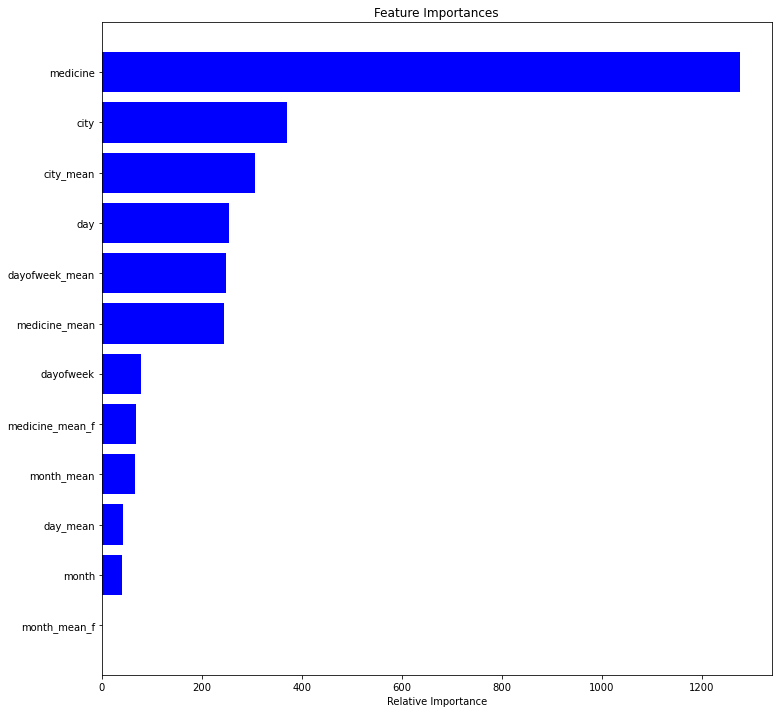

In [72]:
%matplotlib inline
features = X_train.columns
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)),importances[indices], color='b',align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices], fontsize = 10)
plt.xlabel('Relative Importance')
plt.savefig('LightGBM.png')
plt.show()

In [73]:
#Capstone=pd.DataFrame()
#Capstone['id']=df_t['id']
#Capstone['sales']=y_pred_test

In [74]:
#Capstone.to_csv('Sanjay_Rawat_B100_Capstone_Project_54L.csv',index=False)

In [75]:
#@rfc_grid = RandomForestRegressor(n_jobs=-1,max_features='sqrt')
 
 #Use a grid over parameters of interest

#param_grid = { 
           #"n_estimators" : [100, 150, 200, 350, 300, 400, 500],
           #"max_depth" : [2,3,5,8, 10],
          # "min_samples_leaf" : [2, 4,6]}
 
#rfc_cv_grid = GridSearchCV(estimator = rfc_grid, param_grid = param_grid, cv = 10)
#rfc_cv_grid.fit(X = X_train, y = y_train)
#print(rfc_cv_grid.best_score_,rfc_cv_grid.best_params_)

In [76]:
#y_pred_train = rfc_cv_grid.predict(X_train)
#y_pred_val = rfc_cv_grid.predict(X_val)
#y_pred_test = rfc_cv_grid.predict(X_test)
#print(np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
#print(np.sqrt(metrics.mean_squared_error(y_val, y_pred_val)))
